In [91]:
%matplotlib inline

import os
import shutil
import random
import torch
import torchvision
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

torch.manual_seed(0)

import warnings
warnings.filterwarnings('ignore')  

In [92]:
df = pd.read_csv(os.path.join("Dataset", "jaypee_metadata.csv"))
df

,study_id,findings
0,TEST_nx1.jpg,False
1,TEST_nx10.jpg,False
2,TEST_nx11.jpg,False
3,TEST_nx12.jpg,False
4,TEST_nx13.jpg,False
...,...,...
150,TRAIN_px52.jpg,Tuberculosis
151,TRAIN_px6.jpg,Tuberculosis
152,TRAIN_px7.jpg,Tuberculosis
153,TRAIN_px8.jpg,Tuberculosis


In [93]:
value = {"False" : 0, "Tuberculosis" : 1}
df["findings"] = df["findings"].map(value)
df

,study_id,findings
0,TEST_nx1.jpg,0
1,TEST_nx10.jpg,0
2,TEST_nx11.jpg,0
3,TEST_nx12.jpg,0
4,TEST_nx13.jpg,0
...,...,...
150,TRAIN_px52.jpg,1
151,TRAIN_px6.jpg,1
152,TRAIN_px7.jpg,1
153,TRAIN_px8.jpg,1


In [94]:
# for i, j in df.iterrows():
#     study_id = j["study_id"]
#     findings = j["findings"]
#     print(study_id, findings)
dffalse = df[df["findings"] == 0]
dftrue = df[df["findings"] == 1]

In [95]:
dffalse

,study_id,findings
0,TEST_nx1.jpg,0
1,TEST_nx10.jpg,0
2,TEST_nx11.jpg,0
3,TEST_nx12.jpg,0
4,TEST_nx13.jpg,0
...,...,...
98,TRAIN_nx51.jpg,0
99,TRAIN_nx6.jpg,0
100,TRAIN_nx7.jpg,0
101,TRAIN_nx8.jpg,0


In [96]:
dftrue

,study_id,findings
26,TEST_px27.jpg,1
27,TEST_px28.jpg,1
28,TEST_px29.jpg,1
29,TEST_px30.jpg,1
30,TEST_px31.jpg,1
...,...,...
150,TRAIN_px52.jpg,1
151,TRAIN_px6.jpg,1
152,TRAIN_px7.jpg,1
153,TRAIN_px8.jpg,1


In [97]:
imagesDir = os.path.join("Dataset", "images")
all_classes = ["normal", "tuberculosis"]

In [111]:
def createTrain(trainDir, all_classes:list, dfs:dict):
    for individual_class in all_classes:
        destDir = os.path.join(trainDir, individual_class)
        # print(destDir)
        if not os.path.exists(destDir):
            os.makedirs(destDir)
        else:
            print("Directory exists")
            return
        for i in dfs[individual_class].values:
            # print(i[0])
            srcDir = os.path.join(imagesDir, i[0])
            movetoDir = os.path.join(destDir)
            shutil.copy(srcDir, movetoDir)

In [112]:
createTrain(os.path.join("Dataset", "train"), all_classes, {"normal" : dffalse, "tuberculosis" : dftrue})

Directory exists


In [113]:
def createTest(classes:list):
    for i in classes:
        # print(i)
        trainDir = os.path.join("Dataset", "train", i)
        images = os.listdir(trainDir)
        images = random.sample(images, 15)
        destDir = os.path.join("Dataset", "test", i)
        images = [os.path.join(trainDir, img) for img in images]
        # print(images)
        if not os.path.exists(destDir):
            os.makedirs(destDir)
        else:
            print(f"Directory exists")
            return
        
        for img in images:
            shutil.move(img, destDir)
        

In [114]:
createTest(all_classes)

Directory exists


In [115]:
class datasetCreation(torch.utils.data.Dataset):
    def __init__(self, imageDir: str, transform : torchvision.transforms.Compose, all_classes: list):
        def get_image(individual_class):
            images = os.listdir(os.path.join(imageDir, individual_class))
            return images
        
        self.images_dict = {}
        self.transform = transform
        self.all_classes = all_classes
        self.imageDir = imageDir
        
        for i in self.all_classes:
            self.images_dict[i] = get_image(i)
        
        print(self.images_dict)
        
    def __len__(self):
        return sum([len(self.images_dict[i]) for i in self.all_classes])
    
    def __getitem__(self, idx):
        individual_class = random.choice(self.all_classes)
        idx = idx % len(self.images_dict[individual_class]) # To keep the index inside the length of the list of images in individual class
        imagename = self.images_dict[individual_class][idx]
        imagepath = os.path.join(self.imageDir, individual_class, imagename)
        image = Image.open(imagepath).convert('RGB')
        return self.transform(image), self.all_classes.index(individual_class)

In [116]:
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(224, 224)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [117]:
trainDataset = datasetCreation(os.path.join("Dataset", "train"), train_transform, all_classes)
testDataset = datasetCreation(os.path.join("Dataset", "test"), test_transform, all_classes)

{'normal': ['TEST_nx1.jpg', 'TEST_nx10.jpg', 'TEST_nx11.jpg', 'TEST_nx12.jpg', 'TEST_nx13.jpg', 'TEST_nx14.jpg', 'TEST_nx15.jpg', 'TEST_nx16.jpg', 'TEST_nx17.jpg', 'TEST_nx18.jpg', 'TEST_nx19.jpg', 'TEST_nx2.jpg', 'TEST_nx20.jpg', 'TEST_nx21.jpg', 'TEST_nx22.jpg', 'TEST_nx23.jpg', 'TEST_nx24.jpg', 'TEST_nx25.jpg', 'TEST_nx26.jpg', 'TEST_nx3.jpg', 'TEST_nx4.jpg', 'TEST_nx5.jpg', 'TEST_nx6.jpg', 'TEST_nx7.jpg', 'TEST_nx8.jpg', 'TEST_nx9.jpg', 'TRAIN_nx1.jpg', 'TRAIN_nx10.jpg', 'TRAIN_nx11.jpg', 'TRAIN_nx12.jpg', 'TRAIN_nx13.jpg', 'TRAIN_nx14.jpg', 'TRAIN_nx15.jpg', 'TRAIN_nx16.jpg', 'TRAIN_nx17.jpg', 'TRAIN_nx18.jpg', 'TRAIN_nx19.jpg', 'TRAIN_nx2.jpg', 'TRAIN_nx20.jpg', 'TRAIN_nx21.jpg', 'TRAIN_nx22.jpg', 'TRAIN_nx23.jpg', 'TRAIN_nx24.jpg', 'TRAIN_nx25.jpg', 'TRAIN_nx26.jpg', 'TRAIN_nx27.jpg', 'TRAIN_nx28.jpg', 'TRAIN_nx29.jpg', 'TRAIN_nx3.jpg', 'TRAIN_nx30.jpg', 'TRAIN_nx31.jpg', 'TRAIN_nx32.jpg', 'TRAIN_nx33.jpg', 'TRAIN_nx34.jpg', 'TRAIN_nx35.jpg', 'TRAIN_nx36.jpg', 'TRAIN_nx37.jpg', 

In [118]:
batch_size = 4

dl_train = torch.utils.data.DataLoader(trainDataset, batch_size=batch_size, shuffle=True)
dl_test = torch.utils.data.DataLoader(testDataset, batch_size=batch_size, shuffle=True)

print('Number of training batches', len(dl_train))
print('Number of test batches', len(dl_test))

Number of training batches 39
Number of test batches 8


In [119]:
resnet18 = torchvision.models.resnet18(pretrained=True)

print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [120]:
resnet18.fc = torch.nn.Linear(in_features=512, out_features=2)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.parameters(), lr=3e-5)

In [121]:
def show_images(images, labels, preds):
    plt.figure(figsize=(8, 4))
    for i, image in enumerate(images):
        plt.subplot(1, 6, i + 1, xticks=[], yticks=[])
        image = image.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = image * std + mean
        image = np.clip(image, 0., 1.)
        plt.imshow(image)
        col = 'green'
        if preds[i] != labels[i]:
            col = 'red'
            
        plt.xlabel(f'{all_classes[int(labels[i].numpy())]}')
        plt.ylabel(f'{all_classes[int(preds[i].numpy())]}', color=col)
    plt.tight_layout()
    plt.show()

In [122]:
def show_preds():
    resnet18.eval() # set to evaluation mode
    images, labels = next(iter(dl_test))
    # print(images, labels)
    outputs = resnet18(images) 
    _, preds = torch.max(outputs, 1)
    show_images(images, labels, preds)

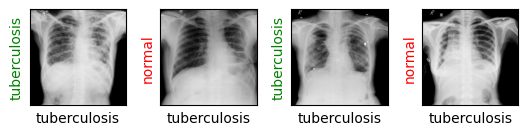

In [123]:
show_preds()

In [124]:
def train(epochs):
    print('Starting training..')
    for e in range(0, epochs):
        print('='*20)
        print(f'Starting epoch {e + 1}/{epochs}')
        print('='*20)

        train_loss = 0.
        val_loss = 0.

        resnet18.train() # set model to training phase

        for train_step, (images, labels) in enumerate(dl_train):
            optimizer.zero_grad()
            outputs = resnet18(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            if train_step % 20 == 0:
                print('Evaluating at step', train_step)

                accuracy = 0

                resnet18.eval() # set model to eval phase

                for val_step, (images, labels) in enumerate(dl_test):
                    outputs = resnet18(images)
                    loss = loss_fn(outputs, labels)
                    val_loss += loss.item()

                    _, preds = torch.max(outputs, 1)
                    accuracy += sum((preds == labels).numpy())

                val_loss /= (val_step + 1)
                accuracy = accuracy/len(testDataset)
                print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')

                show_preds()

                resnet18.train()

                if accuracy >= 0.98:
                    print('Performance condition satisfied, stopping..')
                    return

        train_loss /= (train_step + 1)

        print(f'Training Loss: {train_loss:.4f}')
    print('Training complete..')

Starting training..
Starting epoch 1/20
Evaluating at step 0
Validation Loss: 0.6662, Accuracy: 0.5667


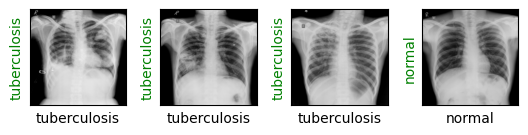

Evaluating at step 20
Validation Loss: 0.6391, Accuracy: 0.7333


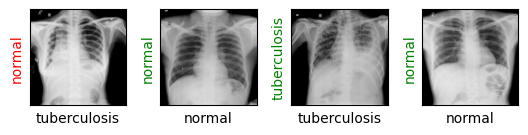

Training Loss: 0.5578
Starting epoch 2/20
Evaluating at step 0
Validation Loss: 0.4770, Accuracy: 0.9000


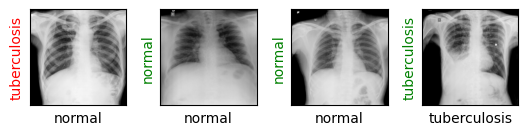

Evaluating at step 20
Validation Loss: 0.2808, Accuracy: 0.9667


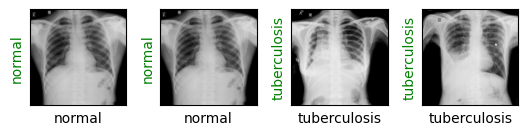

Training Loss: 0.3278
Starting epoch 3/20
Evaluating at step 0
Validation Loss: 0.1956, Accuracy: 0.9000


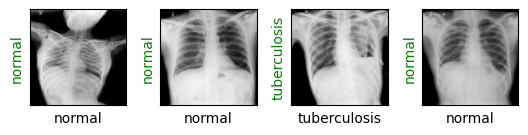

Evaluating at step 20
Validation Loss: 0.2293, Accuracy: 0.9333


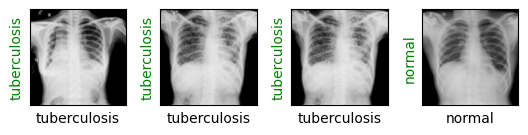

Training Loss: 0.3006
Starting epoch 4/20
Evaluating at step 0
Validation Loss: 0.1535, Accuracy: 0.9667


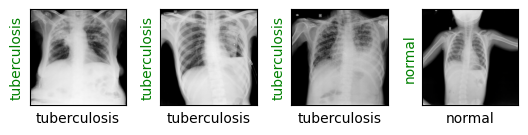

Evaluating at step 20
Validation Loss: 0.0985, Accuracy: 1.0000


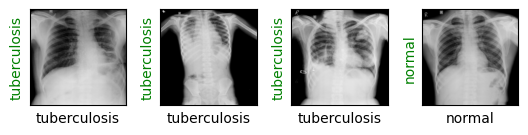

Performance condition satisfied, stopping..


In [125]:
train(epochs=20)

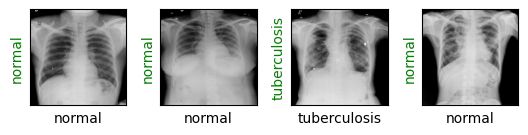

In [126]:
show_preds()

In [128]:
resnet18.eval()
random_input = torch.randn(1,3,224,224)
onnx_output_path = "tuberculosisModel.onnx"
torch.onnx.export(
    resnet18,
    random_input,
    onnx_output_path,
    export_params=True,        # Store the trained parameter weights inside the model file
              # Specify the ONNX version
    do_constant_folding=True,  # Simplify the model by folding constant nodes
    input_names=['input'],     # Define input layer name
    output_names=['output']    # Define output layer name
)